#### imports

In [35]:
from qiskit import QuantumCircuit, assemble, Aer, execute, IBMQ
from qiskit.tools import job_monitor
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import plot_bloch_multivector
from qiskit_textbook.tools import array_to_latex

import numpy as np

#### create quantum circuit

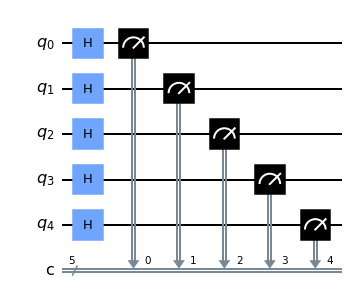

In [36]:
# Get # of qubits for quantum circuit and range of random num
def init_gen(n_qubits, _min, _max):
    if n_qubits > 6:
        init_gen()
    else:
        return n_qubits, _min, _max


n_qubits, _min, _max = init_gen(
    int(input('Choose # of qubits (limit: 5) -> ')),
    int(input('Choose min')),
    int(input('Choose max'))
)


qc = QuantumCircuit(n_qubits, n_qubits)

for i in range(n_qubits):
    qc.h(i)

qc.measure(range(n_qubits), range(n_qubits))

qobj = assemble(qc)

qc.draw(output='mpl')

#### run circuit on quantum computer

ibmqfactory.load_account:WARNING:2021-05-29 22:28:14,889: Credentials are already in use. The existing account in the session will be replaced.


Running on ibmq_athens
Job Status: job has successfully run
state -> 00011


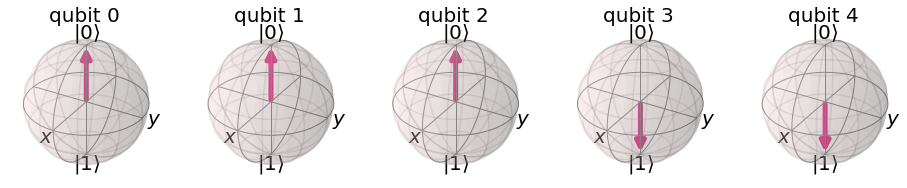

In [37]:
IBMQ.load_account()

provider = IBMQ.get_provider('ibm-q')

# Get least busy computer.
qcomp = provider.get_backend('ibmq_athens')
print('Running on', qcomp)

# NOTE: To choose the best backend, check: https://quantum-computing.ibm.com/services?systems=yours

# Run circuit.  
job = execute(qc, backend=qcomp, memory=True)
job_monitor(job)

result = job.result()

state = result.get_memory(qc)[0]

print('state ->', state)

statevectors = [
    [1, 0],
    [0, 1]
]

for i, qubit_state in enumerate(state):
    qc.initialize(statevectors[int(qubit_state)], i)

qc.draw()

qobj = assemble(qc)

# # NOTE: The reason why we re-initialize the state as the result of the simulation
# #       is so that we can represent that state on a bloch sphere.

simulator = Aer.get_backend('statevector_simulator')

job = simulator.run(qobj)
statevector = job.result().get_statevector(qc)

plot_bloch_multivector(statevector)

# TODO: Add notify to this.

#### convert statevector to random number

In [38]:
# Maps one range to another
def real_map(value, leftMin, leftMax, rightMin, rightMax):
    # Figure out how 'wide' each range is
    leftSpan = leftMax - leftMin
    rightSpan = rightMax - rightMin

    # Convert the left range into a 0-1 range (float)
    valueScaled = float(value - leftMin) / float(leftSpan)

    # Convert the 0-1 range into a value in the right range.
    return rightMin + (valueScaled * rightSpan)

n1, n2, n3 = (0, 0, 0)
for i in range(statevector.size):
    if abs(statevector[i]) != 0:
        n1 = i
        n2 = np.real(statevector[i])
        n3 = np.imag(statevector[i])

print(real_map(n1+n2+n3, -n_qubits, len(statevector)-1+n_qubits, _min, _max))

0.7317073170731707
